In [16]:
from app.allocation import *
import matplotlib.pyplot as plt
from app.alloc_metric import *
from pprint import pprint
from collections import defaultdict 
import time
import json
import csv
import math

In [42]:
import math
import numpy as np
def createMockData(noStudent, tightness, load, num_choices, ratioProjectStaff, ratioStudentGeneral, equalCloseness,scale):
    noStaff = math.ceil((noStudent * tightness)/load)
    projectPop = [np.random.normal(scale=1.0) for i in range(load*noStaff)]
    staffPop =   [np.random.normal(scale=ratioProjectStaff) for i in range(noStaff)]
    staffProjMap = {i+1:j.item() for i, j in enumerate(np.repeat(np.arange(1, noStaff+1),load))}
    studentPreferences = defaultdict(list)
    for i in range(noStudent):
        projectFit = [ratioStudentGeneral*np.random.normal(scale=1.0) for i in range(len(projectPop))]
        staffFit = [ratioStudentGeneral*np.random.normal(scale=ratioProjectStaff) for i in range(len(staffPop))]
        totalStaffPref = np.add(staffPop, staffFit)
        totalProjPref = np.add(projectPop, projectFit)
        finalPref = np.add(totalProjPref,np.repeat(totalStaffPref, load))
        finalPref = np.array([x/sum(finalPref) for x in finalPref])
        selectedProject = np.argsort(-finalPref)[:num_choices]
        studentPreferences[i] += [(selectedProject[0].item(), 1)]
        print(selectedProject)
        rank = 1
        for j, (proj, prev_proj) in enumerate(zip(selectedProject[1:], selectedProject)):
            # x =  finalPref[prev_proj] - finalPref[proj]
            x = random.random()
            rank = rank if scale*math.exp(-x*equalCloseness) > j+1 else j+2

            studentPreferences[i] += [((proj.item()), rank)]
        print(studentPreferences[i])
    return studentPreferences, staffProjMap
# yeet = createMockData(100, 2, 5, 10, 1, 1, 0.002, 1)


In [32]:
studentPref = "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/prefs.csv"
ProjectInfo =  "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/proj.csv"

with open(studentPref, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    studentPreferences = createStudentPrefMap(inputDict)
with open(ProjectInfo, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    StaffProjMap = createProjStaffMap(inputDict)
config = Config(defaultLoad = 10, maxDepth = 3)
studentProjectList = {
    student: [proj for proj, _ in projList]
    for student, projList in studentPreferences.items()
}
costMap = getCostMap(studentPreferences)
alloc = bestAllocate(studentPreferences, StaffProjMap, config=config)


started run 0
started run 1
started run 2
started run 3
started run 4


In [37]:
def showPopularity(pref):
    projectStudentMap = defaultdict(int)
    for _, l in pref.items():
        for p, l in l:
            projectStudentMap[p] += 10-l
    if projectStudentMap[0]: projectStudentMap.pop(0)
    return projectStudentMap

def showPopularityChoice(pref, choice):
    projectStudentMap = defaultdict(int)
    for _, l in pref.items():
        for p, l in l:
            if l == choice:
                projectStudentMap[p] += 1
    if projectStudentMap[0]: projectStudentMap.pop(0)
    return projectStudentMap


def staffPopularity(pref, projStaff):
    projectMap = showPopularity(pref)
    out = defaultdict(int)
    for k, v in projectMap.items():
        out[projStaff.get(k, 0)] += v
    return out

def getEqualChoice(studentPref):
    res = defaultdict(int)
    for s, prefs in studentPref.items():
        for (cProj, cRank), (nProj, nRank) in zip(prefs, prefs[1:]):
                res[cRank] += 1
    return res

def getStaffLoading(projStaff):
    out = defaultdict(int)
    for p, s in projStaff.items():
        out[s]+=1
    return out
# staffPopularity(pref2, staff)

In [34]:
pref2, staff = createMockData(133, 200/133, 5, 10, 0.6, 1.07 ,2.7, 8)

[133  57  45  51  56  84  83  47  44 145]
[(133, 1), (57, 1), (45, 1), (51, 4), (56, 5), (84, 6), (83, 6), (47, 8), (44, 9), (145, 10)]
[150  28  56 133 104  47  63  64  73 151]
[(150, 1), (28, 2), (56, 2), (133, 4), (104, 5), (47, 6), (63, 7), (64, 8), (73, 9), (151, 10)]
[133  15 163  87  71  75  49  64  86  48]
[(133, 1), (15, 1), (163, 1), (87, 4), (71, 5), (75, 6), (49, 7), (64, 8), (86, 9), (48, 10)]
[ 61 106  48 151 119  64  62  75  90  49]
[(61, 1), (106, 1), (48, 3), (151, 4), (119, 4), (64, 6), (62, 7), (75, 8), (90, 9), (49, 10)]
[129 133  64  25  63 106  85   0  70 199]
[(129, 1), (133, 1), (64, 1), (25, 4), (63, 5), (106, 6), (85, 7), (0, 8), (70, 9), (199, 10)]
[150 161 127  48  44 185 187  45  80  56]
[(150, 1), (161, 1), (127, 1), (48, 1), (44, 5), (185, 6), (187, 7), (45, 8), (80, 9), (56, 10)]
[182 183 151  64  37  67  51 130 133  97]
[(182, 1), (183, 2), (151, 2), (64, 4), (37, 5), (67, 6), (51, 7), (130, 8), (133, 9), (97, 10)]
[ 44  21   1  28 117  49  93  56  83  

[145 104  69  53  64  34 136  83 186  68]
[(145, 1), (104, 1), (69, 3), (53, 3), (64, 5), (34, 6), (136, 7), (83, 8), (186, 9), (68, 10)]
[ 84   8 155 191  57   9 139  83  42  30]
[(84, 1), (8, 1), (155, 3), (191, 4), (57, 5), (9, 6), (139, 7), (83, 8), (42, 9), (30, 10)]
[ 17 157 178  31 117   7  50 141  22 171]
[(17, 1), (157, 1), (178, 3), (31, 3), (117, 5), (7, 6), (50, 7), (141, 8), (22, 9), (171, 10)]
[ 16  30 151 167 185  28  83  33 145  98]
[(16, 1), (30, 1), (151, 3), (167, 4), (185, 4), (28, 6), (83, 7), (33, 8), (145, 9), (98, 10)]
[182  45 130 111  20  64 133 154 148  84]
[(182, 1), (45, 2), (130, 2), (111, 2), (20, 5), (64, 6), (133, 7), (154, 8), (148, 9), (84, 10)]
[194 155 131 196  69  58 191 184 104 112]
[(194, 1), (155, 1), (131, 3), (196, 4), (69, 5), (58, 6), (191, 7), (184, 7), (104, 9), (112, 10)]
[145 190 191  96  71 111  64 181  33  68]
[(145, 1), (190, 1), (191, 3), (96, 4), (71, 5), (111, 5), (64, 7), (181, 8), (33, 9), (68, 10)]
[190  95 145 192 191 161  68  

(array([ 0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

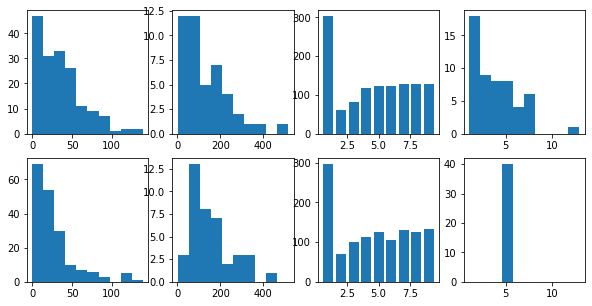

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(10,5))
pref2, staff = createMockData(133, 200/133, 5, 10, 0.5, 1.24 ,2.7, 8)
pop = showPopularity(studentPreferences)
_, bins, _ = axes[0][0].hist(pop.values())
pop2 = showPopularity(pref2)
axes[1][0].hist(pop2.values(), bins=bins)

pop = staffPopularity(studentPreferences, StaffProjMap)
_, bins, _ =  axes[0][1].hist(pop.values())
pop2 = staffPopularity(pref2, staff)
axes[1][1].hist(pop2.values(), bins=bins)

equalChoices_mock = getEqualChoice(pref2)
equalChoices_actual = getEqualChoice(studentPreferences)

axes[0][2].bar(equalChoices_actual.keys(), equalChoices_actual.values())
axes[1][2].bar(equalChoices_mock.keys(), equalChoices_mock.values())


s1 = getStaffLoading(StaffProjMap)
_, bins, _ =  axes[0][3].hist(s1.values())
s2 = getStaffLoading(staff)
axes[1][3].hist(s2.values(), bins=bins)


In [25]:
result = bestAllocate(pref2, staff, config=Config(numRuns=1, maxDepth=5))
getStat(result, getCostMap(pref2), staff)

started run 0
['76 139 1', '93 45 1', '100 2 1', '17 19 1', '25 18 7', '40 30 4', '111 189 1', '62 171 1', '12 84 1', '115 1 1', '41 190 1', '103 92 1', '79 154 1', '46 98 1', '64 67 3', '4 96 6', '87 150 1', '69 129 2', '5 138 1', '16 22 3', '38 143 5', '18 109 1', '49 186 2', '126 81 1', '28 198 3', '32 105 2', '130 42 6', '56 131 1', '114 149 1', '54 187 1', '99 148 1', '118 168 4', '116 48 4', '74 125 1', '63 89 3', '39 91 1', '47 174 3', '55 100 4', '77 185 1', '109 77 1', '97 74 4', '72 197 1', '35 192 1', '45 113 1', '117 82 2', '80 178 1', '82 97 1', '57 23 1', '108 110 1', '112 31 1', '2 126 2', '36 136 2', '89 75 1', '95 93 1', '73 63 5', '107 141 2', '84 137 1', '113 55 2', '66 118 1', '9 106 3', '6 132 1', '127 56 1', '7 196 1', '120 62 1', '59 188 1', '43 193 2', '88 79 1', '21 191 1', '37 9 8', '110 112 5', '123 33 1', '51 102 1', '131 183 1', '53 72 1', '96 4 6', '58 122 1', '128 134 1', '15 21 7', '42 46 1', '86 12 1', '52 182 5', '8 94 1', '44 85 1', '60 156 1', '105 4

{'MaxRank': 9,
 'MedianRank': 1,
 'AvgRank': 2.3157894736842106,
 'VarianceRank': 3.8250890383854372,
 'MaxLoad': 5,
 'MedianLoad': 3.0,
 'VarLoad': 1.269375,
 'NoUnfair': 55,
 'MagUnfair': 109,
 'AveUnfair': 0.8195488721804511,
 'NoUnalloc': 0}

In [26]:
result = bestAllocate(studentPreferences, StaffProjMap,  config=Config(numRuns=10, maxDepth=5))
getStat(result, getCostMap(studentPreferences), StaffProjMap)

started run 0
started run 1
started run 2
started run 3
started run 4
started run 5
started run 6
started run 7
started run 8
started run 9
['90406 1801630 3', '90382 1801538 1', '90298 1801527 1', '90334 1801765 1', '89278 1801174 1', '90361 1801772 1', '90432 1801674 1', '90433 1801746 1', '90415 1801628 1', '90422 1801776 7', '90445 1801755 1', '90366 1801626 6', '65768 1800893 1', '90317 1801640 1', '90367 1801608 1', '90306 1801607 1', '90374 1801684 1', '90572 1801777 1', '90421 1801693 3', '90313 1801689 1', '90391 1801653 1', '90310 1801638 1', '90379 1801783 1', '90387 1801665 1', '90352 1801724 2', '90331 1801379 1', '90354 1801622 1', '90802 1801380 1', '90808 1801694 1', '90304 1801604 1', '90420 1801753 5', '90431 1801541 1', '90425 1801499 1', '90338 1801747 1', '90364 1801639 2', '90429 1801415 1', '90440 1801416 1', '90343 1801412 1', '90414 1801787 1', '90307 1801666 1', '90320 1801705 5', '90394 1801767 1', '90344 1801673 2', '90430 1801637 1', '90333 1801648 7', '904

{'MaxRank': 7,
 'MedianRank': 1,
 'AvgRank': 1.5714285714285714,
 'VarianceRank': 1.8990332975295383,
 'MaxLoad': 5,
 'MedianLoad': 3.5,
 'VarLoad': 2.149375,
 'NoUnfair': 30,
 'MagUnfair': 54,
 'AveUnfair': 0.40601503759398494,
 'NoUnalloc': 0}

In [44]:
with open('./evaluations/mockdata/fourth/prefs.json', 'w') as pref_f:
    json.dump(pref2, pref_f)
with open('./evaluations/mockdata/fourth/proj.json', 'w') as staff_f:
    json.dump(staff, staff_f)

In [28]:
print(staff)osecondsecondsthriirdteasyeasy

SyntaxError: invalid syntax (<ipython-input-28-01be0402c112>, line 1)

In [28]:
print(StaffProjMap)
for proj, staff in StaffProjMap.items():
    res[staff] 

{1801604: 8, 1801605: 8, 1801641: 8, 1801642: 8, 1801663: 8, 1801678: 8, 1801679: 8, 1801379: 30, 1801380: 30, 1801383: 30, 1801621: 30, 1801686: 10, 1801687: 10, 1801658: 45, 1801659: 45, 1801660: 45, 1801662: 45, 1801759: 1, 1801761: 1, 1801472: 20, 1801477: 20, 1801478: 20, 1801572: 20, 1801639: 20, 1801751: 20, 1801499: 43, 1801500: 43, 1801657: 43, 1801630: 48, 1801631: 48, 1801632: 48, 1801633: 48, 1801634: 48, 1801801: 48, 1801613: 13, 1801614: 13, 1801615: 13, 1801618: 13, 1801773: 13, 1801774: 13, 1801775: 13, 1801799: 13, 1801625: 31, 1801626: 31, 1801627: 31, 1801628: 31, 1801643: 6, 1801644: 6, 1801645: 6, 1801646: 6, 1801647: 6, 1801680: 40, 1801681: 40, 1801682: 40, 1801541: 41, 1801749: 41, 1801750: 41, 1801454: 44, 1801455: 44, 1801683: 44, 1801684: 44, 1801685: 44, 1801730: 44, 1801731: 44, 1801654: 53, 1801655: 53, 1801656: 53, 1801797: 53, 1801740: 49, 1801741: 49, 1801743: 49, 1801707: 38, 1801708: 38, 1801709: 38, 1801712: 38, 1801692: 24, 1801693: 24, 1801694: 24,